In [1]:
from bling import Api, ApiError
import pandas as pd

api = Api('920feadbcc9525902531f5ec7c67c53ddb8cd79e7a4dc03a00cf48087f8389c866f877ca')

itens_pedidos = []
##pedidos em andamento - BOLETOS JÁ PAGO E CARTÃO.
try:
	pedidos = api.get_orders(issued_date=['10/11/2020', '10/01/2021']) ##periodo dos pedidos selecionados
	for pedido in pedidos:
		if pedido['situacao'] == 'Em andamento' or pedido['situacao'] == 'Atendido':
			for itens in (pedido['itens']):
				itens_pedidos.append(itens)
except ApiError as e:
	print(e.response)

In [2]:
#armazena datas min e max da serie pra usar no titulo do grafico
datas = []
data_min = []
data_max = []
for x in range(len(pedidos)):
    datas.append(pedidos[x]['data'])
data_min = min(datas)
data_max = max(datas)

In [3]:
#extrai só os codigos dos itens incluidos nos pedidos
codigos_contagem=[]
desc_contagem=[]
qtd=[]

for x in range(len(itens_pedidos)):
    codigos_contagem.append(itens_pedidos[x]['item']['codigo'])
    desc_contagem.append(itens_pedidos[x]['item']['descricao'])
    qtd.append(itens_pedidos[x]['item']['quantidade'])

In [4]:
#Cria o DF_pedidos e faz ajustes pras plotagens de cor e tamanho
DF_pedidos = pd.DataFrame(list(zip(codigos_contagem,desc_contagem,qtd)),columns = ['codigo','desc','qtd'])
divisao = DF_pedidos['codigo'].str.split('-')
codigo = divisao.str.get(0)
tamanho = divisao.str.get(1)
cor = divisao.str.get(2)
DF_pedidos['codigo'] = codigo
DF_pedidos['tamanho'] = tamanho
DF_pedidos['cor'] = cor
for index, row in  DF_pedidos.iterrows():
    if row['cor'] == 'P':
        DF_pedidos.loc[index,'cor'] = 'Preto'
    elif row['cor'] == 'B':
        DF_pedidos.loc[index,'cor'] = 'Branco'
DF_camisetas = DF_pedidos[(DF_pedidos['cor'] == 'Preto') | (DF_pedidos['cor'] == 'Branco')].reset_index()
DF_camisetas.drop(columns = 'index', axis = 1, inplace = True)

In [5]:
#Agrupa por modelo e da o count pra plotagem
plt_modelos = DF_camisetas.groupby(['codigo']).agg({'tamanho':'count'}).rename(columns={"tamanho":"quantidade","codigo":"cod"}).sort_values('quantidade',ascending=False).reset_index()
plt_modelos

,codigo,quantidade
0,AMDE0,84
1,SABO0,70
2,ADAN,68
3,DESG0,67
4,EDBR,56
...,...,...
58,REMAAM,1
59,MCAF,1
60,RELOIPAM,1
61,RELODESG0,1


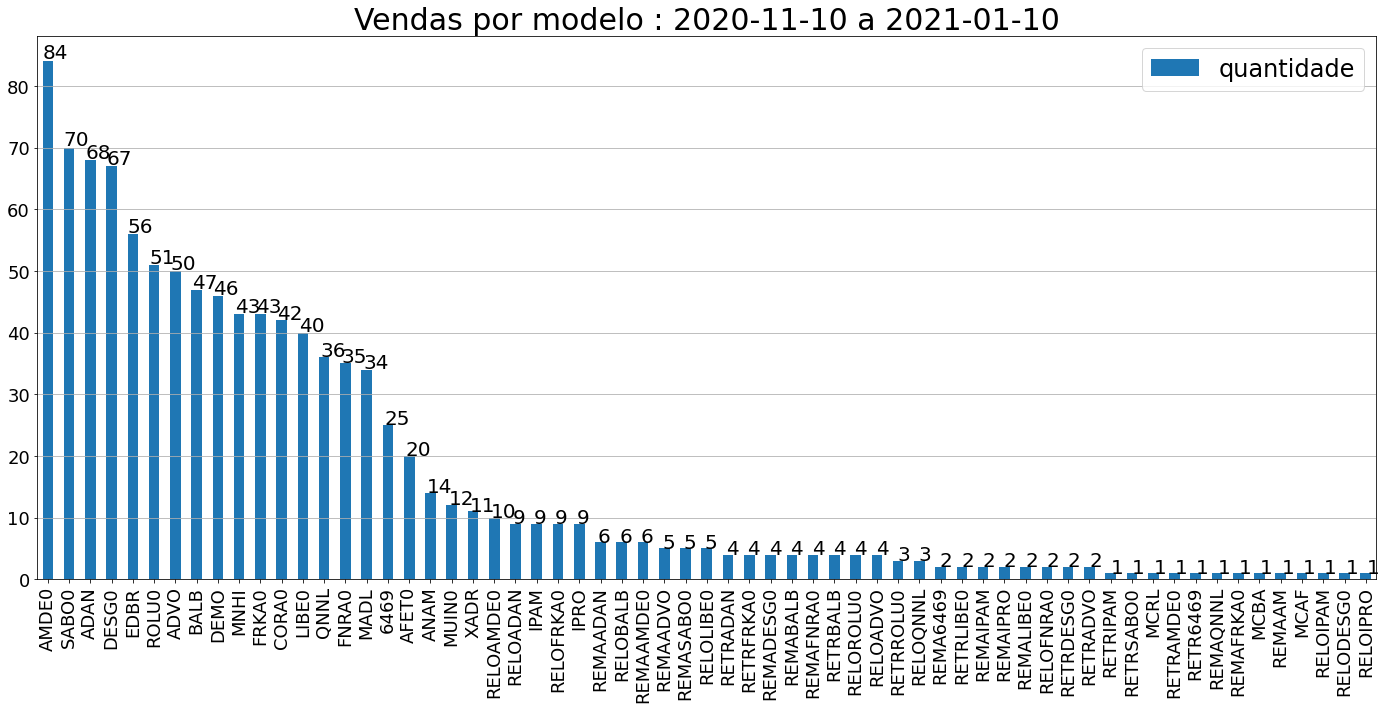

In [6]:
#plota o grafico de vendas por modelo no período definido na função get_orders()
import numpy as np
import matplotlib.pyplot as plt

ax = plt_modelos.plot(kind='bar', x ='codigo', y ='quantidade', figsize=(24,10),fontsize=18)
plt.grid(axis='y')
plt.legend(fontsize = 24)
plt.title(f'Vendas por modelo : {data_min} a {data_max}', fontsize = 30)
plt.xlabel("")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), size = 20)
plt.savefig('RelatorioVendasporModelo.png', dpi = 300, bbox_inches='tight')
plt.show()

In [7]:
#adiciona a columa tamcor e separa em tipo de camisetas os DF
DF_camisetas['tamcor'] = DF_camisetas['tamanho'] + ' ' + DF_camisetas['cor']
DF_regfemlong = DF_camisetas.loc[DF_camisetas['codigo'].str[0:4] == 'RELO'].reset_index(drop=True)
DF_regfemtrad = DF_camisetas.loc[DF_camisetas['codigo'].str[0:4] == 'RETR'].reset_index(drop=True)
DF_regmasc = DF_camisetas.loc[DF_camisetas['codigo'].str[0:4] == 'REMA'].reset_index(drop=True)
regatas = ['REMA', 'RETR', 'RELO']
DF_cam = DF_camisetas[~DF_camisetas.codigo.str[0:4].isin(regatas)]

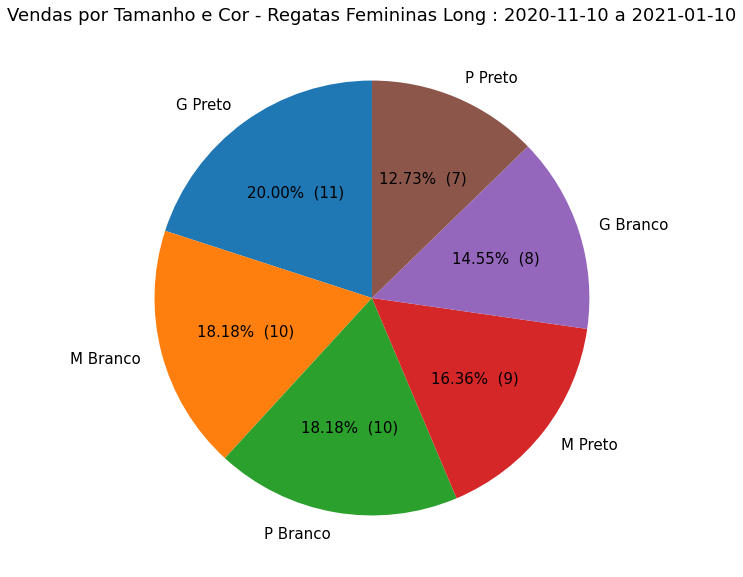

In [8]:
#Plota as Regatas Femininas Long
plt_regfemlong = DF_regfemlong.groupby(['tamcor']).agg({'tamcor':'count'}).rename(columns={"tamcor":"quantidade","codigo":"cod"}).reset_index()
plt_regfemlong = plt_regfemlong.sort_values('quantidade', ascending = False).reset_index().drop(columns = 'index')

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(24,10))
textprops = {"fontsize": 15}
ax1.pie(plt_regfemlong['quantidade'],
        labels = plt_regfemlong['tamcor'], autopct=make_autopct(plt_regfemlong['quantidade']),startangle = 90, textprops = textprops )
plt.title(f'Vendas por Tamanho e Cor - Regatas Femininas Long : {data_min} a {data_max}', fontsize = 18)
plt.savefig('3.4RelatóriodeTamCorRegFemLong.png', dpi = 300, bbox_inches='tight')
plt.show()

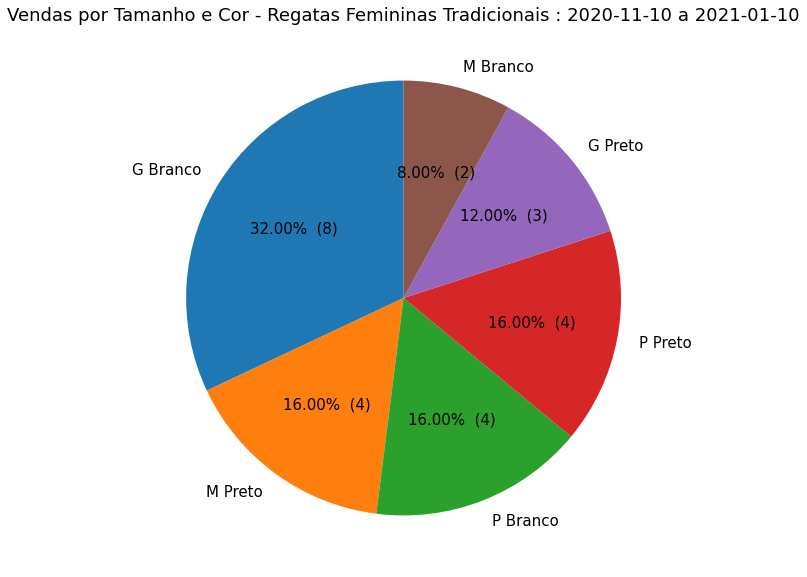

In [9]:
#Plota as Regatas Femininas Tradicionais
plt_regfemtrad = DF_regfemtrad.groupby(['tamcor']).agg({'tamcor':'count'}).rename(columns={"tamcor":"quantidade","codigo":"cod"}).reset_index()
plt_regfemtrad = plt_regfemtrad.sort_values('quantidade', ascending = False).reset_index().drop(columns = 'index')

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(24,10))
textprops = {"fontsize": 15}
ax1.pie(plt_regfemtrad['quantidade'],
        labels = plt_regfemtrad['tamcor'], autopct=make_autopct(plt_regfemtrad['quantidade']),startangle = 90, textprops = textprops )
plt.title(f'Vendas por Tamanho e Cor - Regatas Femininas Tradicionais : {data_min} a {data_max}', fontsize = 18)
plt.savefig('3.2RelatóriodeTamCorregfemtrad.png', dpi = 300, bbox_inches='tight')
plt.show()

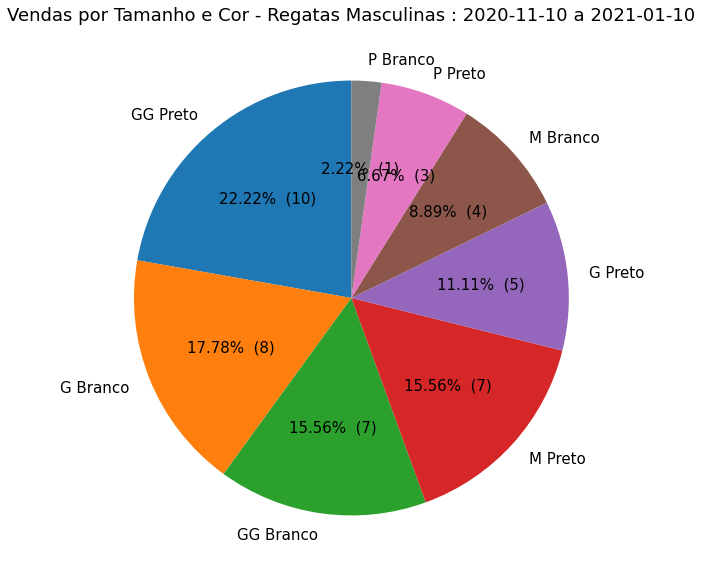

In [10]:
#Plota as Regatas Masculinas
plt_regmasc = DF_regmasc.groupby(['tamcor']).agg({'tamcor':'count'}).rename(columns={"tamcor":"quantidade","codigo":"cod"}).reset_index()
plt_regmasc = plt_regmasc.sort_values('quantidade', ascending = False).reset_index().drop(columns = 'index')

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(24,10))
textprops = {"fontsize": 15}
ax1.pie(plt_regmasc['quantidade'],
        labels = plt_regmasc['tamcor'], autopct=make_autopct(plt_regmasc['quantidade']),startangle = 90, textprops = textprops )
plt.title(f'Vendas por Tamanho e Cor - Regatas Masculinas : {data_min} a {data_max}', fontsize = 18)
plt.savefig('3.3RelatóriodeTamCorregmasc.png', dpi = 300, bbox_inches='tight')
plt.show()

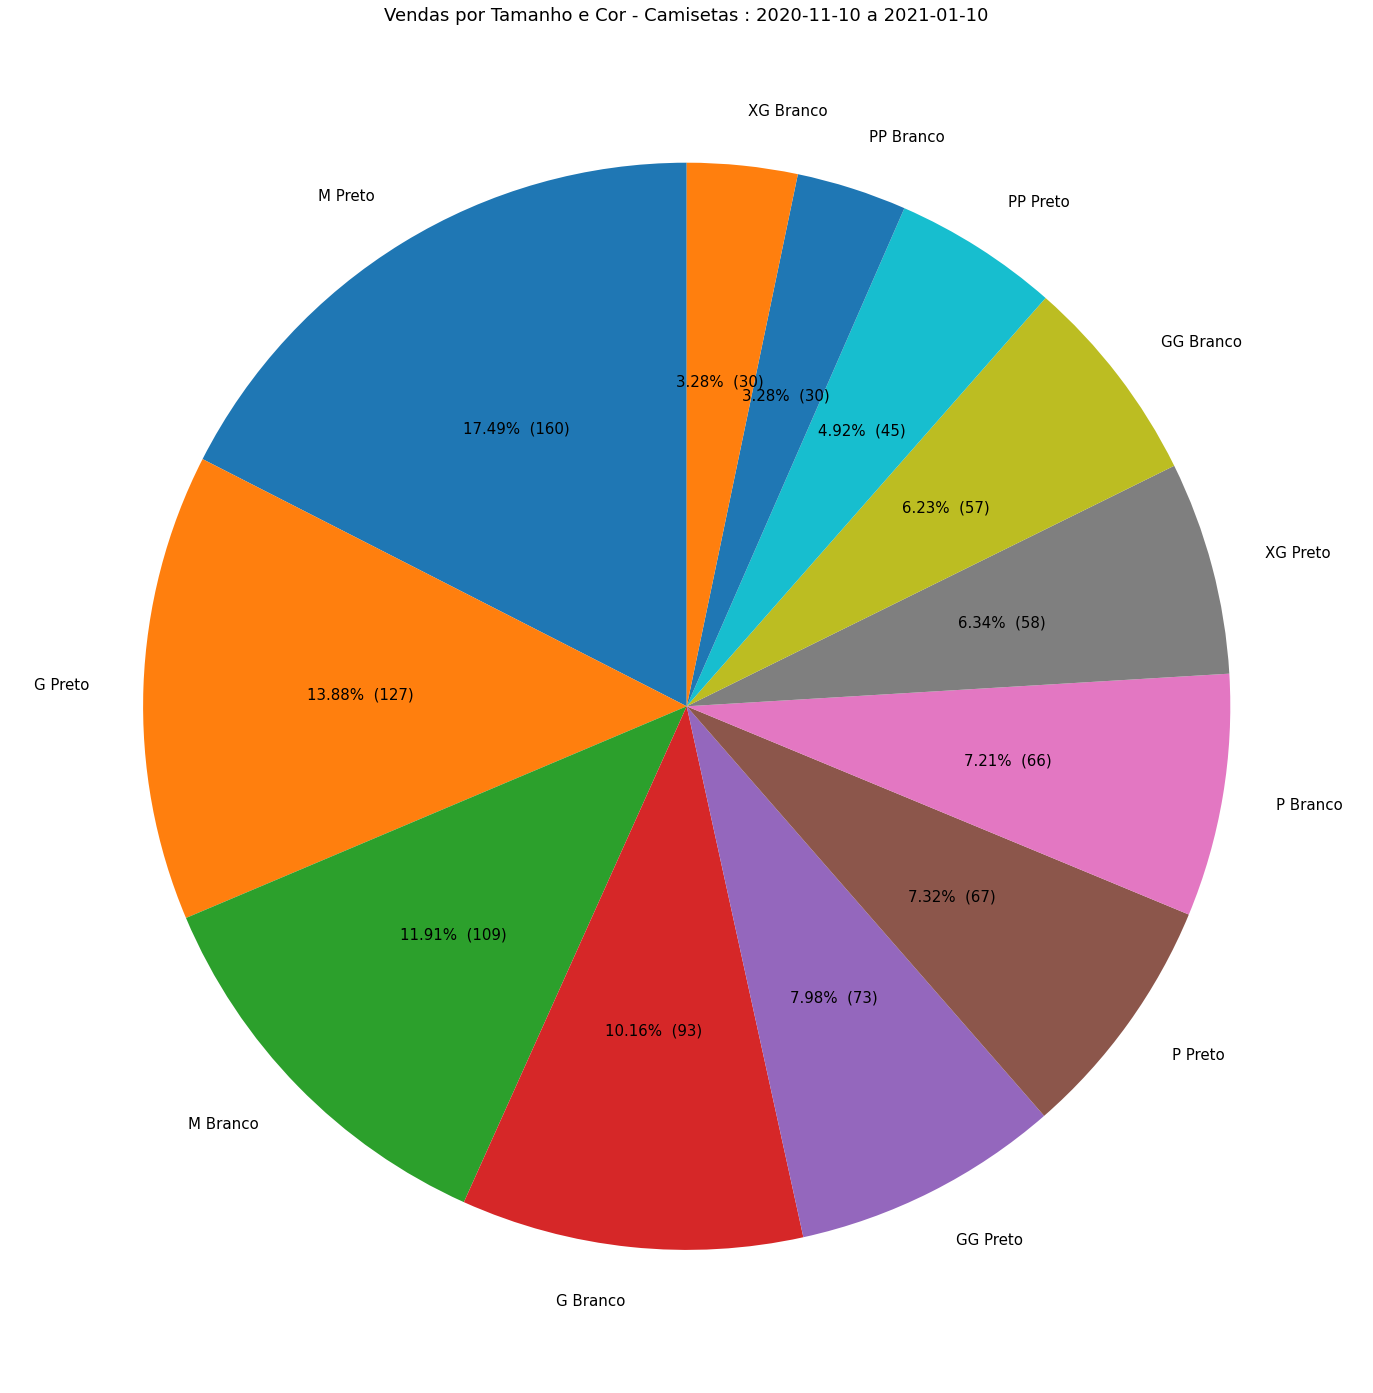

In [11]:
#Plota as Camisetas
plt_cam = DF_cam.groupby(['tamcor']).agg({'tamcor':'count'}).rename(columns={"tamcor":"quantidade","codigo":"cod"}).reset_index()
plt_cam = plt_cam.sort_values('quantidade', ascending = False).reset_index().drop(columns = 'index')

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

fig1, ax1 = plt.subplots(figsize=(45,25))
textprops = {"fontsize": 15}
ax1.pie(plt_cam['quantidade'],
        labels = plt_cam['tamcor'], autopct=make_autopct(plt_cam['quantidade']),startangle = 90, textprops = textprops )
plt.title(f'Vendas por Tamanho e Cor - Camisetas : {data_min} a {data_max}', fontsize = 18)
plt.savefig('3.1RelatóriodeTamCorCamisetas.png', dpi = 300, bbox_inches='tight')
plt.show()